<a href="https://colab.research.google.com/github/2303A51494/ADM-Project-B27/blob/main/ADM_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA PREPROCESSING**

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("heartdisease.csv")
categorical_cols = ['sex', 'chest pain type', 'resting ecg', 'exercise angina', 'ST slope']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.to_csv("heart_cleaned.csv", index=False)
print("Preprocessing complete. Cleaned data saved as 'heart_cleaned.csv'")



Preprocessing complete. Cleaned data saved as 'heart_cleaned.csv'


**EXPLORATORY DATA ANALYSIS**

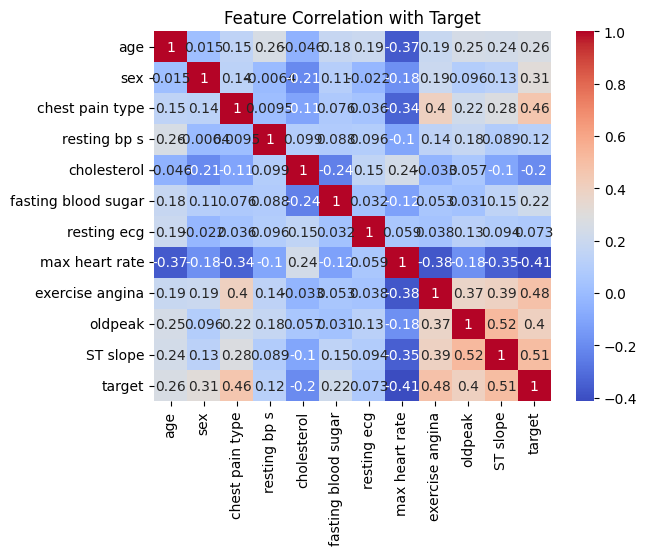

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("heart_cleaned.csv")
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()


**MODEL BUILDING**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
df = pd.read_csv("heart_cleaned.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
joblib.dump((X_test, y_test, lr_model, rf_model), "models_and_data.pkl")


['models_and_data.pkl']

**MODEL EVALUATION**

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       107
           1       0.93      0.98      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



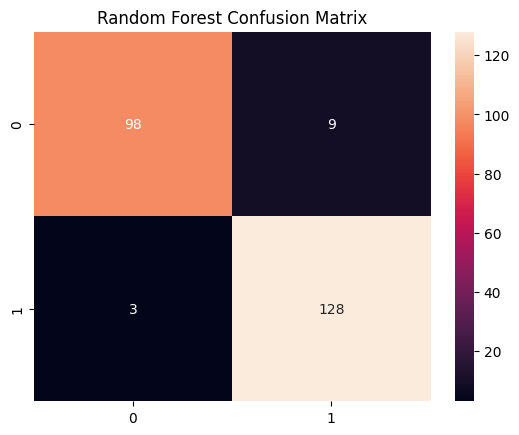

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
X_test, y_test, lr_model, rf_model = joblib.load("models_and_data.pkl")
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


**FEATURE IMPORTANCE**

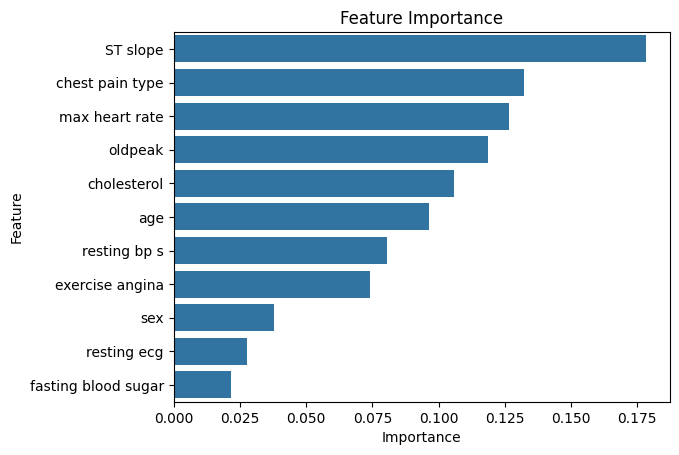

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import numpy as np
df = pd.read_csv("heart_cleaned.csv")
X_test, y_test, lr_model, rf_model = joblib.load("models_and_data.pkl")
importances = rf_model.feature_importances_
features = df.drop("target", axis=1).columns
indices = np.argsort(importances)[::-1]
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


VISUALIZATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.

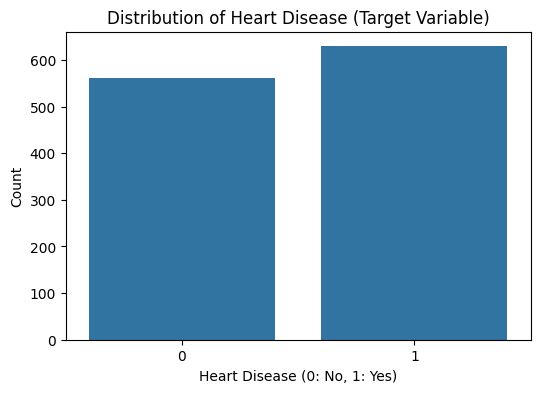

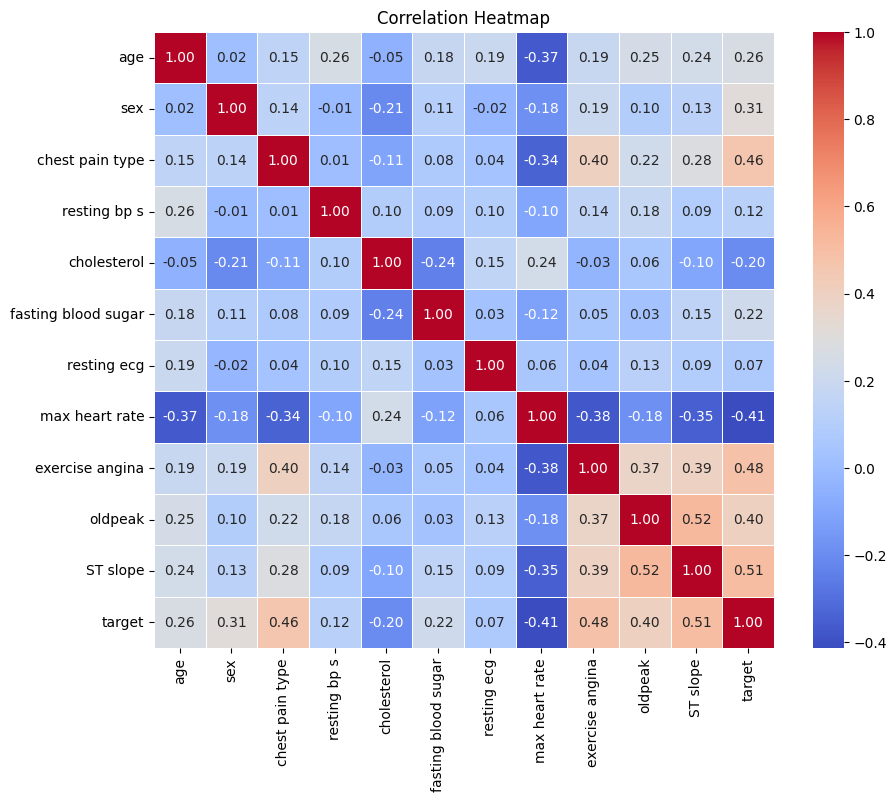

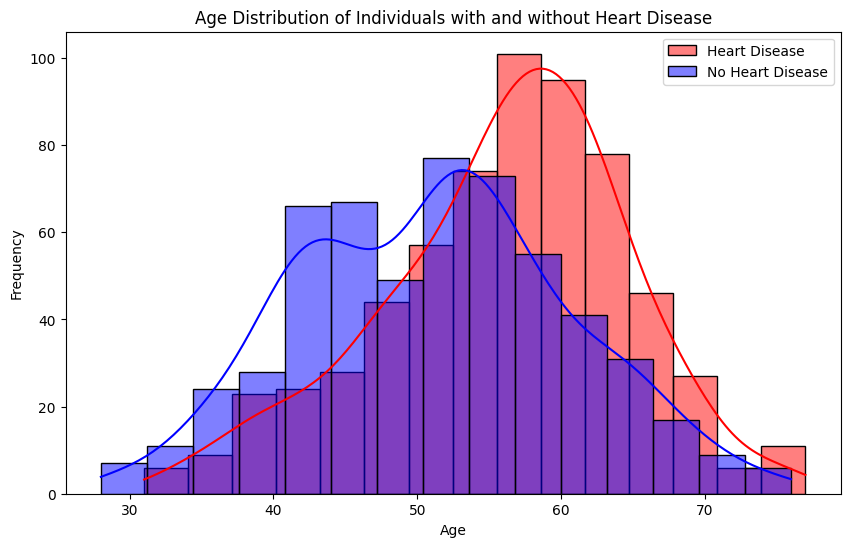

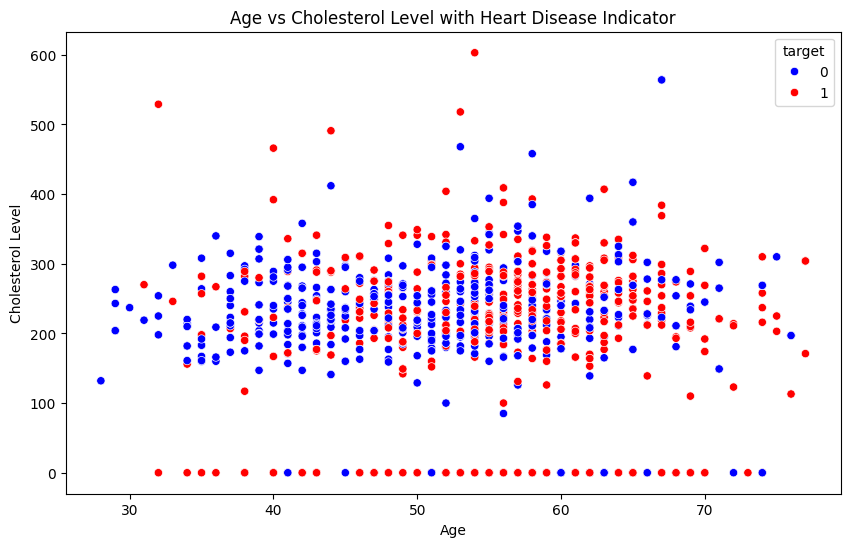

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('heartdisease.csv')
print(df.info())
print(df.describe())
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 1]['age'], kde=True, color='red', label='Heart Disease', bins=15)
sns.histplot(df[df['target'] == 0]['age'], kde=True, color='blue', label='No Heart Disease', bins=15)
plt.title('Age Distribution of Individuals with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='cholesterol', hue='target', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Age vs Cholesterol Level with Heart Disease Indicator')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()
